# Project: Investigation on a tmbd dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
**tmd-movies dataset, is a dataset containing information on 10866 movies together with 21 attributes that are linked to each movie.**
 
 0   id                    :Shows the unique identification of the movie
        
 1   imdb_id               :Shows the unique identification of the movie by imdb
    
 2   popularity            :shows how popular is the movie
    
 3   budget                :describes the movies initial expenditure 
    
 4   revenue               :describes the returns of the movie 
    
 5   original_title        :shows the movies original name
    
 6   cast                  :shows the actors in the movie 
    
 7   homepage              :describes the movie's website
    
 8   director              :shows the movies director
    
 9   tagline               :describes short text to clarify a thought
    
 10  keywords              :shows main words that generally describe the movie
    
 11  overview              :shows the short description of the movie
    
 12  runtime               :shows the length of the movie
    
 13  genres                :shows the movie's themes
    
 14  production_companies  :describes the production companies
    
 15  release_date          :shows when the movie was released
    
 16  vote_count            : shows how many imbd users have voted for the movie
    
 17  vote_average          :shows the mean vote
    
 18  release_year          :shows year of release
    
 19  budget_adj            :shows adjustment to budget of the movie
    
 20  revenue_adj           :shows adjustment of revenue of the movie

## Questions
1. which are the top popular movies?

2. Which are the top years in terms of movies release?

3. Who are the top directors in movies release?

4. Do popular movies happen to be top rated movies?

5. Which are the highly rated genres?

6. Does the length of a movie affect its rating?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
movies = pd.read_csv('./Database_TMDb_movie_data/tmdb-movies.csv')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#function for quick general properties
def general_properties(dataset):
    print('shape :','#find rows and columns') 
    print(dataset.shape)
    print('information :', '#get an overview if their might be nulls')
    print(dataset.info())
    print('description :','#get some statistics on the data')
    print( dataset.describe())

In [4]:
general_properties(movies)

shape : #find rows and columns
(10866, 21)
information : #get an overview if their might be nulls
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average       

In [5]:
#dropping non-required columns
movies.drop(columns=['id', 'imdb_id', 'cast','cast', 'homepage', 'tagline', 'keywords', 'overview'],
            axis=1, inplace=True)
movies.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


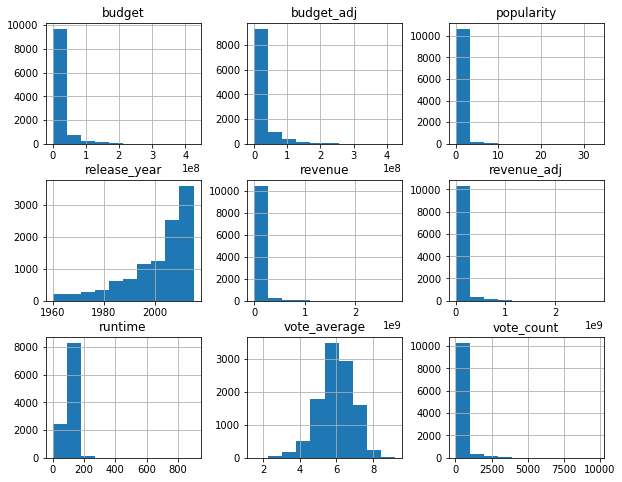

In [6]:
#getting a visualization of the general data
movies.hist(figsize=(10,8));

# Data cleaning

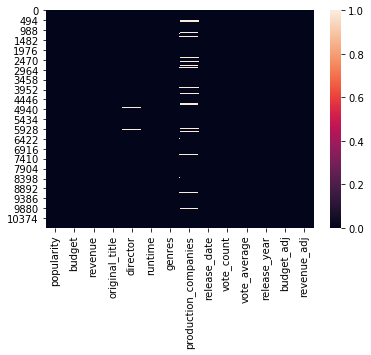

In [7]:
#lets see how nulls are distributed in our dataset
sns.heatmap(movies.isnull());

In [8]:
#cheking for nulls
movies.isnull().any()

popularity              False
budget                  False
revenue                 False
original_title          False
director                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [9]:
#dropping all nulls
movies.dropna(inplace=True)

In [10]:
#recheking the data
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 14 columns):
popularity              9807 non-null float64
budget                  9807 non-null int64
revenue                 9807 non-null int64
original_title          9807 non-null object
director                9807 non-null object
runtime                 9807 non-null int64
genres                  9807 non-null object
production_companies    9807 non-null object
release_date            9807 non-null object
vote_count              9807 non-null int64
vote_average            9807 non-null float64
release_year            9807 non-null int64
budget_adj              9807 non-null float64
revenue_adj             9807 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


In [11]:
#counting the number of duplicates
sum(movies.duplicated())

1

In [12]:
#lets drop the duplicate
movies.drop_duplicates(inplace=True)

In [13]:
#confirming changes
sum(movies.duplicated())

0

In [14]:
#checking datatypes
movies.dtypes

popularity              float64
budget                    int64
revenue                   int64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [15]:
#changing the datatype of release_date
movies['release_date'] = pd.to_datetime(movies.release_year)

<a id='eda'></a>
## Exploratory Data Analysis

###  Question 1 which are the top popular movies?

In [16]:
#sorting movies according to their popularity using sort.values()
#taking the top 100 movies head(20)
#conveting it to a dataframe for easy coparisons between columns
#dropping the annoying index after sorting using reset_index()
movies_toppopular = movies[['popularity', 'original_title']].sort_values(by='popularity', 
                                                                       ascending=False).head(30)
movies_toppopular.reset_index(drop=True, inplace=True)
movies_toppopular = pd.DataFrame(movies_toppopular)
movies_toppopular

,popularity,original_title
0,32.985763,Jurassic World
1,28.419936,Mad Max: Fury Road
2,24.949134,Interstellar
3,14.311205,Guardians of the Galaxy
4,13.112507,Insurgent
5,12.971027,Captain America: The Winter Soldier
6,12.037933,Star Wars
7,11.422751,John Wick
8,11.173104,Star Wars: The Force Awakens
9,10.739009,The Hunger Games: Mockingjay - Part 1


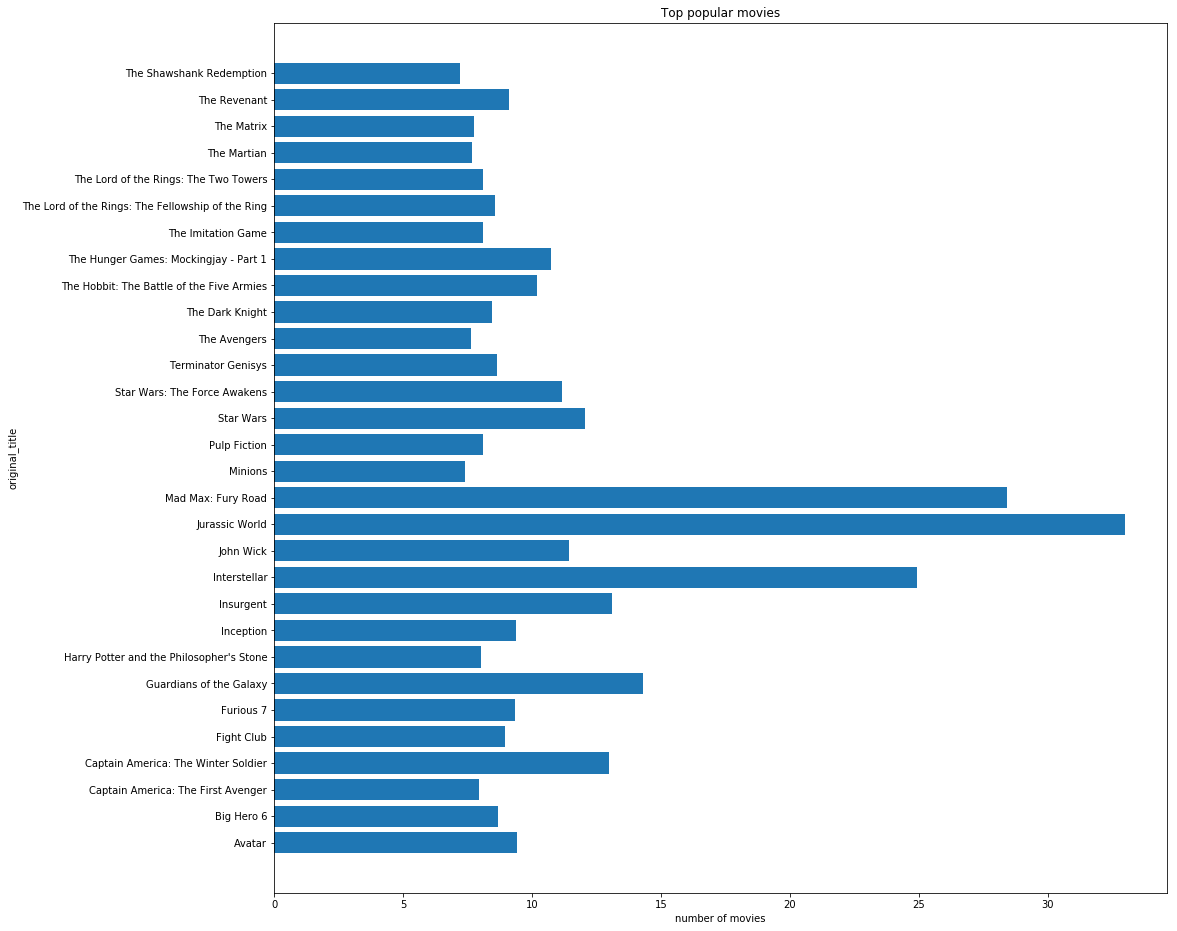

In [17]:
plt.figure(figsize=(16,16))#for allocating size of the figure
plt.title('Top popular movies')
plt.xlabel('number of movies')
plt.ylabel('original_title')
plt.barh( movies_toppopular.original_title, movies_toppopular.popularity);

We can conclude that Jurassic World is the most popular movie and it is closely followed by 
Mad Max: Fury Road

### Question 2  top years in terms of movies release

In [18]:
top_15_years = movies.release_year.value_counts().head(15)
top_15_years

2014    638
2013    568
2015    561
2012    500
2009    474
2011    461
2008    443
2010    421
2007    392
2006    353
2005    324
2003    254
2004    253
2002    243
2001    212
Name: release_year, dtype: int64

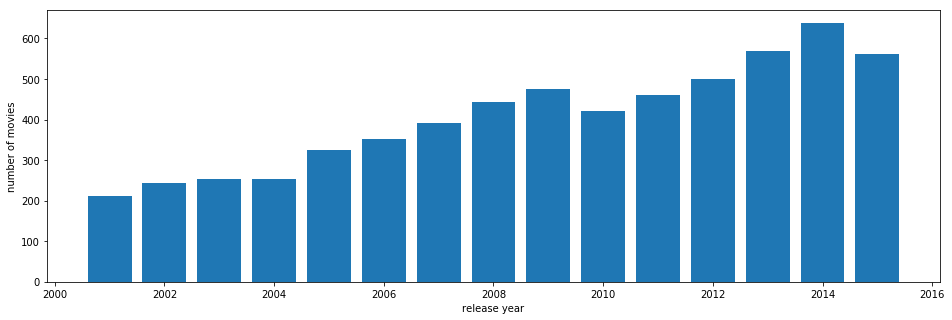

In [19]:
plt.figure(figsize=(16,5))
plt.xlabel('release year')
plt.ylabel('number of movies')
plt.bar(top_15_years.index, top_15_years);

**we can conclude that 2014 is the year with the highest number of releases.
the general trend in movies production is increasing from the year 2001-2014**

# Question 3 Who are the top directors in movies releases?

In [20]:
top_directors = movies.director.value_counts().head(15)
top_directors

Woody Allen          42
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      26
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Wes Craven           19
Tim Burton           18
Mike Nichols         18
John Carpenter       18
David Cronenberg     18
Name: director, dtype: int64

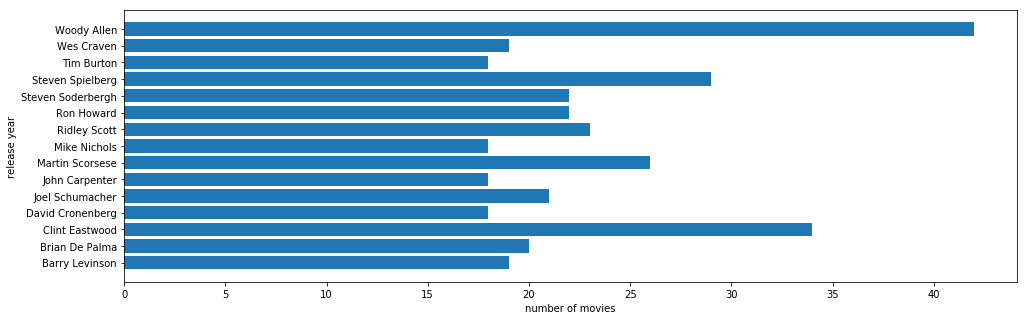

In [21]:
plt.figure(figsize=(16,5))
plt.xlabel('number of movies')
plt.ylabel('release year')
plt.barh(top_directors.index, top_directors);

we can conclude that Woody Allen is the top director in terms of movies releases. He has featured in 42 
releases.

# Question 4: Do popular movies happen to be top rated movies?

**since Popularity is a quantative variable we need to create distinctions**

In [22]:
# View the min, 25%, 50%, 75%, max popularity values with Pandas describe
movies.popularity.describe()

count    9806.000000
mean        0.693143
std         1.035525
min         0.000188
25%         0.231581
50%         0.418755
75%         0.774232
max        32.985763
Name: popularity, dtype: float64

In [23]:
#bin values that will be used to "cut" the data into groups
bin_values = [0.000188, 0.231581, 0.418756, 0.774231, 32.985763]

In [24]:
#labels for the four popularity levels
bin_names = ['not popular','less popular','popular','very popular']

In [25]:
#create popular level columns
movies['popularity_levels'] = pd.cut(movies['popularity'], bin_values, labels=bin_names) 
movies.sample(5)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_levels
8799,0.196668,24000000,12372410,Ready to Rumble,Brian Robbins,107,Action|Comedy|Drama,Bel Air Entertainment|Warner Bros.,1970-01-01 00:00:00.000002000,16,4.4,2000,3.039101e+07,1.566709e+07,not popular
6433,0.265732,0,0,House of Fury,Stephen Fung,102,Action|Comedy|Foreign,Emperor Multimedia Group (EMG)|JCE Entertainme...,1970-01-01 00:00:00.000002005,18,6.4,2005,0.000000e+00,0.000000e+00,less popular
6696,0.575781,0,0,Hollow Man II,Claudio FÃ¤h,91,Horror|Action|Thriller|Science Fiction,Destination Films|Red Wagon Entertainment|Fron...,1970-01-01 00:00:00.000002006,32,5.1,2006,0.000000e+00,0.000000e+00,popular
1084,0.228495,0,0,10.000 KM,Carlos Marques-Marcet,99,Comedy|Drama|Romance,TelevisiÃ³n EspaÃ±ola (TVE)|TelevisiÃ³ de Cata...,1970-01-01 00:00:00.000002014,24,6.2,2014,0.000000e+00,0.000000e+00,not popular
10090,0.318177,0,0,I Love You to Death,Lawrence Kasdan,94,Action|Comedy|Crime,TriStar Pictures,1970-01-01 00:00:00.000001990,26,6.1,1990,0.000000e+00,0.000000e+00,less popular


In [26]:
popularity = movies.groupby('popularity_levels').mean().vote_average
popularity

popularity_levels
not popular     5.812036
less popular    5.792574
popular         5.952917
very popular    6.307993
Name: vote_average, dtype: float64

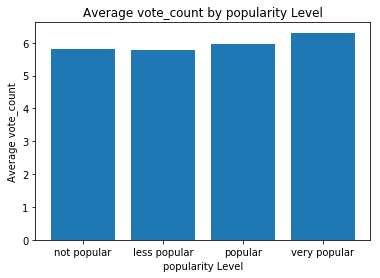

In [27]:
locations = [1, 2, 3, 4]
plt.bar(locations, popularity, tick_label=popularity.index)
plt.title('Average vote_count by popularity Level')
plt.xlabel('popularity Level')
plt.ylabel('Average vote_count');

**Clearly we can coclude that top popular movies are also top rated.**

# Question 5: Which are the highly rated genres?

In [28]:
#to find this we need to label our data according to ratings(vote_average)
movies.describe().vote_average

count    9806.000000
mean        5.966459
std         0.914291
min         1.500000
25%         5.400000
50%         6.000000
75%         6.600000
max         8.700000
Name: vote_average, dtype: float64

In [29]:
#bin values that will be used to "cut" the data into groups
bin_values = [1.5, 5.4, 6.0, 6.6, 8.7]

In [30]:
#labels for the four popularity levels
bin_names = ['lowly_rated','average_rated','above_average_rated','highly_rated']

In [31]:
movies['rating_levels'] = pd.cut(movies['vote_average'], bin_values, labels=bin_names)
movies.sample(5)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_levels,rating_levels
9126,0.230420,0,0,The Second Arrival,Kevin Tenney,101,Action|Adventure|Science Fiction|Thriller,Rootbeer Films|Taurus 7 Film Corporation,1970-01-01 00:00:00.000001998,11,2.9,1998,0.000000e+00,0.000000e+00,not popular,lowly_rated
10727,0.859806,3600000,44785053,Midnight Cowboy,John Schlesinger,113,Drama,United Artists|Florin Productions|Jerome Hellm...,1970-01-01 00:00:00.000001969,124,7.0,1969,2.139935e+07,2.662142e+08,very popular,highly_rated
6411,0.317018,18000000,0,The Big White,Mark Mylod,100,Comedy|Crime|Drama,Capitol Films|Ascendant Pictures|Rising Star|F...,1970-01-01 00:00:00.000002005,40,6.2,2005,2.009814e+07,0.000000e+00,less popular,above_average_rated
10059,0.285403,0,0,Desperate Hours,Michael Cimino,105,Mystery|Thriller,Metro-Goldwyn-Mayer (MGM),1970-01-01 00:00:00.000001990,15,5.2,1990,0.000000e+00,0.000000e+00,less popular,lowly_rated
8724,0.632783,83000000,59468275,The Flintstones in Viva Rock Vegas,Brian Levant,90,Science Fiction|Comedy|Family|Romance,Universal Pictures|Amblin Entertainment,1970-01-01 00:00:00.000002000,55,4.4,2000,1.051022e+08,7.530421e+07,popular,lowly_rated


In [32]:
#lets create a dataframe of highly reated movies
hi_movies = movies[movies.rating_levels == 'highly_rated']
hi_movies.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_levels,rating_levels
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,1970-01-01 00:00:00.000002015,6185,7.1,2015,1.379999e+08,3.481613e+08,very popular,highly_rated
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,1970-01-01 00:00:00.000002015,5292,7.5,2015,1.839999e+08,1.902723e+09,very popular,highly_rated
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,1970-01-01 00:00:00.000002015,2947,7.3,2015,1.747999e+08,1.385749e+09,very popular,highly_rated
5,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,1970-01-01 00:00:00.000002015,3929,7.2,2015,1.241999e+08,4.903142e+08,very popular,highly_rated
7,7.667400,108000000,595380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,1970-01-01 00:00:00.000002015,4572,7.6,2015,9.935996e+07,5.477497e+08,very popular,highly_rated


In [33]:
#lets group by genres
top_genres = hi_movies.genres.value_counts().head(15)
top_genres

Drama                   252
Documentary             134
Drama|Romance            91
Comedy                   85
Comedy|Drama             78
Crime|Drama              40
Comedy|Drama|Romance     36
Documentary|Music        32
Animation|Family         32
Drama|Comedy             29
Crime|Drama|Thriller     26
Drama|History            24
Drama|Crime              23
Comedy|Romance           22
Drama|Thriller           18
Name: genres, dtype: int64

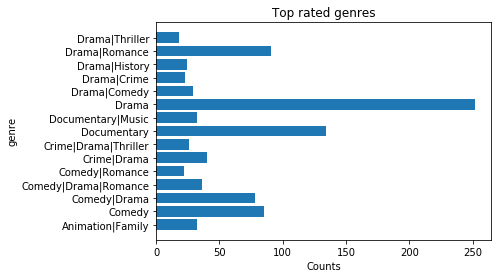

In [34]:
figsize=(16,16)
plt.barh(top_genres.index,top_genres)
plt.title('Top rated genres')
plt.xlabel('Counts')
plt.ylabel('genre');

we can conclude that drama is the most rated genre followed by documentary.

# Question 6: Does the length of a movie affect its rating?

In [35]:
movies.describe().runtime

count    9806.000000
mean      102.744340
std        28.134561
min         0.000000
25%        90.000000
50%       100.000000
75%       112.000000
max       877.000000
Name: runtime, dtype: float64

In [36]:
#lets discard movies that have a runtime of 0
#but lets make a copy first of our dataset
movies2 = movies.copy()
movies2 = movies2[movies.runtime != 0.0]#we are negating to remove 0 in runtime

In [37]:
#lets confirm if we have 0
movies2[movies2.runtime == 0]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,popularity_levels,rating_levels


In [38]:
#lets find the median and divide the data into two groups
movies2.runtime.median()

100.0

In [39]:
#using a query to find the short group
short = movies2.query('runtime < 100')

In [40]:
#finding the average between the group
short_mean= short.vote_average.mean()
short_mean

5.7161746617466171

In [41]:
#using a query to find the long group
long = movies2.query('runtime > 100')

In [42]:
#finding the average between the group
long_mean = long.vote_average.mean()
long_mean

6.2361014744145713

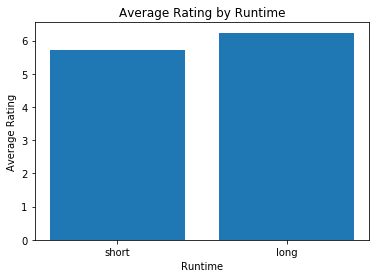

In [43]:
locations = [2, 1]
heights = [long_mean, short_mean]
labels = ['long', 'short']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Rating by Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Rating');

we can generally conclude that longer movies often achieve higher ratings compared to those that have shorter durations.

<a id='conclusions'></a>
## Conclusions
I started by loading the data into my jupyter notebook, i then dug into the general properties of the data like the shape, the number of
columns it contains and its summary statistics.
I went further to clean the data of any nulls present, duplicates and wrong data types. I then started working on the data
to answer the quetions I asked.
I have worked on the assumption that removing some rows which have null data in some columns does not affect my analysis at all.
And by general reasoning, I have removed rows with zero runtime since that is not sensible. 
The sample of data after removing nulls is not generally representitive of the whole population, same results as when the data is
complete might not be observed.
I have come up with these conclusions to the questions found in the introduction part:
    
    Question 1 which are the top popular movies?
    
    Jurasic World is the most popular movie followed by Mad Max. In the analysis I have shown the top 30 popular movies.
    
    Question 2 Which are the top years in terms of movies release?
    2014 was the year with most movie releases and the trend in movie release generally increases from 2001-2014.
    
    Question 3  Who are the top directors in movies release?
    Wood Allen is the top movie director in terms of movie releases, he has a record 42 movies
    released so far. I have shown top 15 directors who have contributed to movie release.
    
    Question 4 Do popular movies happen to be top rated movies?
    From visualization it is clearly noted that popular movies tend to being among the top
    rated movies.
    
    Question 5 Which are the highly rated genres?
    Drama is the best rated genre followed by documentary. I have shown further top 15 genres.
    
    Question 6  Does the length of a movie affect its rating?
    Movies with longer durations tend to receive higher ratings as compared to those with shorter durations.
    
    LIMITATIONS 
    1.The data is not representative of the whole population. This is due to the null values in the data which needs to be
    cleaned, it has an effect on the insights generated from the data. If the data was to be free of null values, the 
    conclusions drawn from it might be different. 
    
    2. The data I used was not enough to make very conclusive results. For example the runtime of some movies is zero, so
    i got rid of them to come up with my conclusions. We can't be able to watch a movie that does not span even a minutes 
    longer.
    
    3. The data also contains many movies with zero budgets. For sure no movie cannot generate a cost for releasing it. 
    So if you are to answer questions regarding budgets the data may be misleading, unless we clear of zero costs. This also
    distorts some features of the data, as conclusions that will be generated do not include some movies.

# References

w3schools:https://www.w3schools.com/python/pandas/default.asp
        
pandas official documentantion:https://pandas.pydata.org/docs/

jovian:https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas